# 27.12.21
## שקף 22

In [1]:
from random import randint as ri
from itertools import chain
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime as dt
import matplotlib.ticker as mtick

#all
all_data = pd.read_excel("Data2/קובץ מתכלל כללי.xlsx")

#sviot ratzon
all_data[all_data.columns[41]] = all_data[all_data.columns[41]].apply(lambda x: "כן" if x==0 else "לא")

#colors
my_colors = ["orange","yellow","red","lime","pink",
         "mediumpurple","skyblue","cornflowerblue","gray","gainsboro",
         "gold","turquoise","chocolate","forestgreen","orchid"]


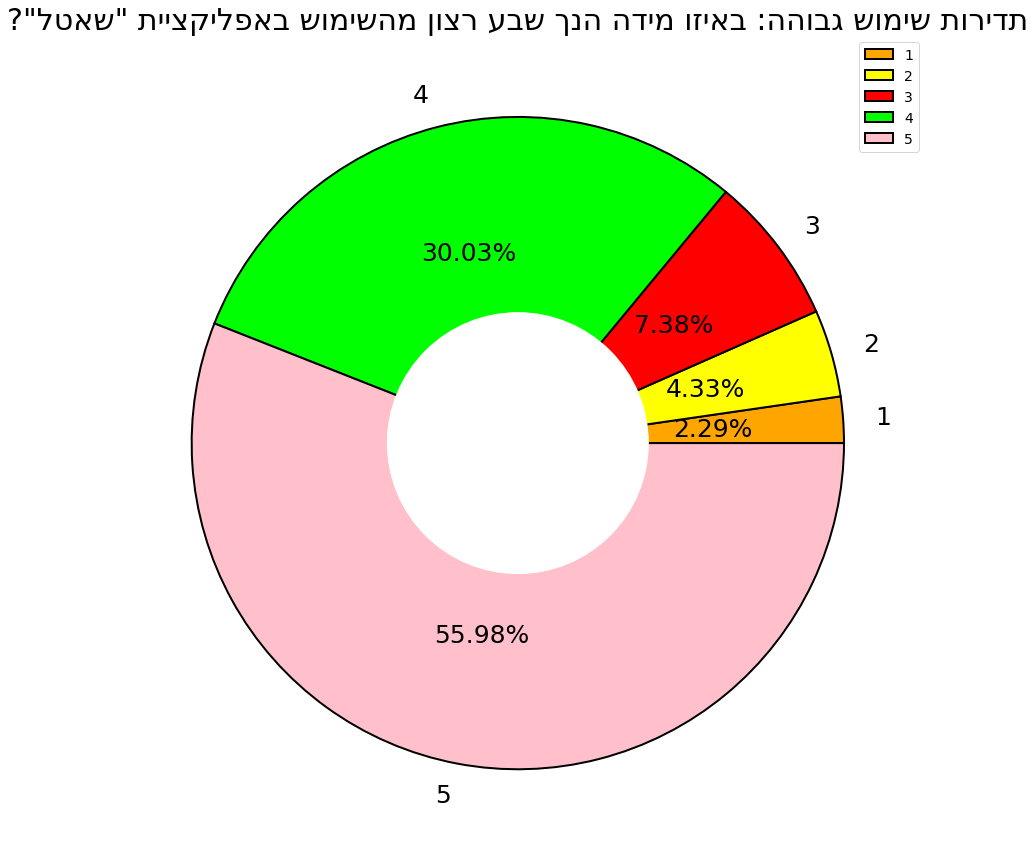

In [2]:
df = all_data[all_data[all_data.columns[29]].isin([4,5])][all_data.columns[28]].value_counts().sort_index()
labels = [int(i) for i in df.index]
sizes = df.values


#labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,df.values/sum(df.values)))

colors = dict(zip(labels,my_colors[:5]))
plt.figure(figsize  = (15,15))


circle = plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.pie(sizes, labels=[label if label_dict[label]>0.01  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 1 else '',textprops={'fontsize': 25}
       ,wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
title_text = "תדירות שימוש גבוהה: " + all_data.columns[28]
plt.title(title_text[::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,fontsize = 14)


plt.show()

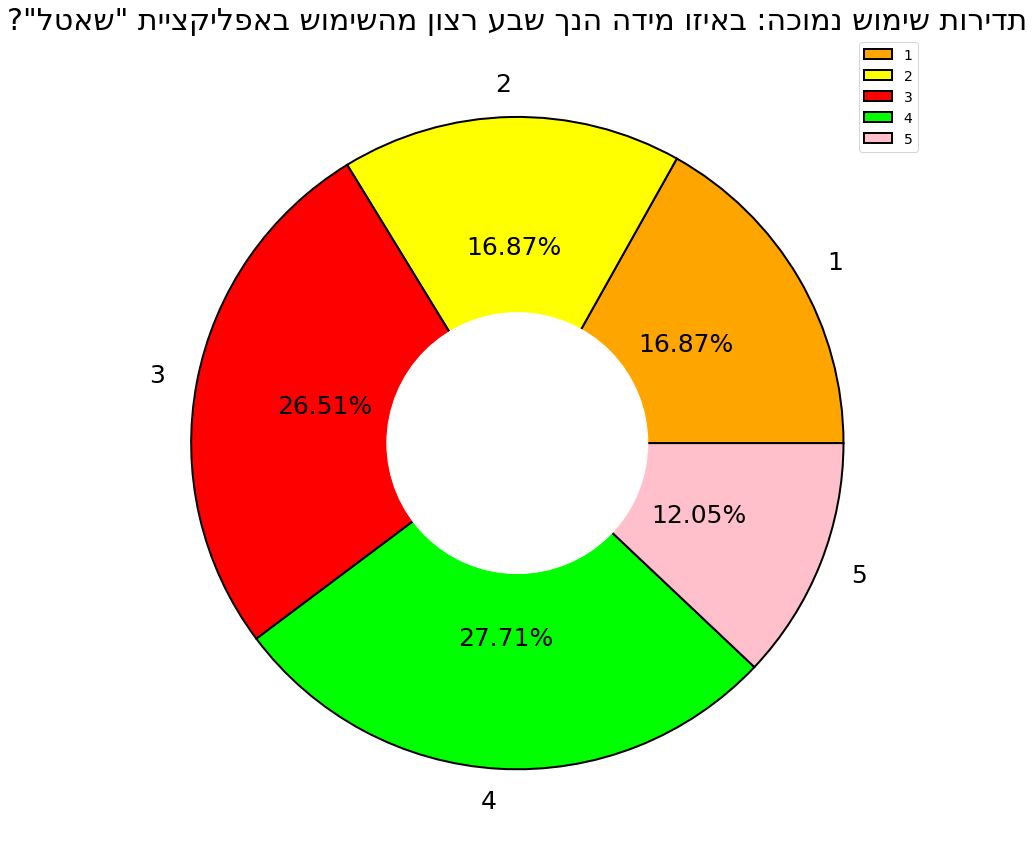

In [3]:
df = all_data[all_data[all_data.columns[29]].isin([1,2])][all_data.columns[28]].value_counts().sort_index()
labels = [int(i) for i in df.index]
sizes = df.values


#labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,df.values/sum(df.values)))

colors = dict(zip(labels,my_colors[:5]))
plt.figure(figsize  = (15,15))


circle = plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.pie(sizes, labels=[label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25}
       ,wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
title_text = "תדירות שימוש נמוכה: " + all_data.columns[28]
plt.title(title_text[::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,fontsize = 14)


plt.show()

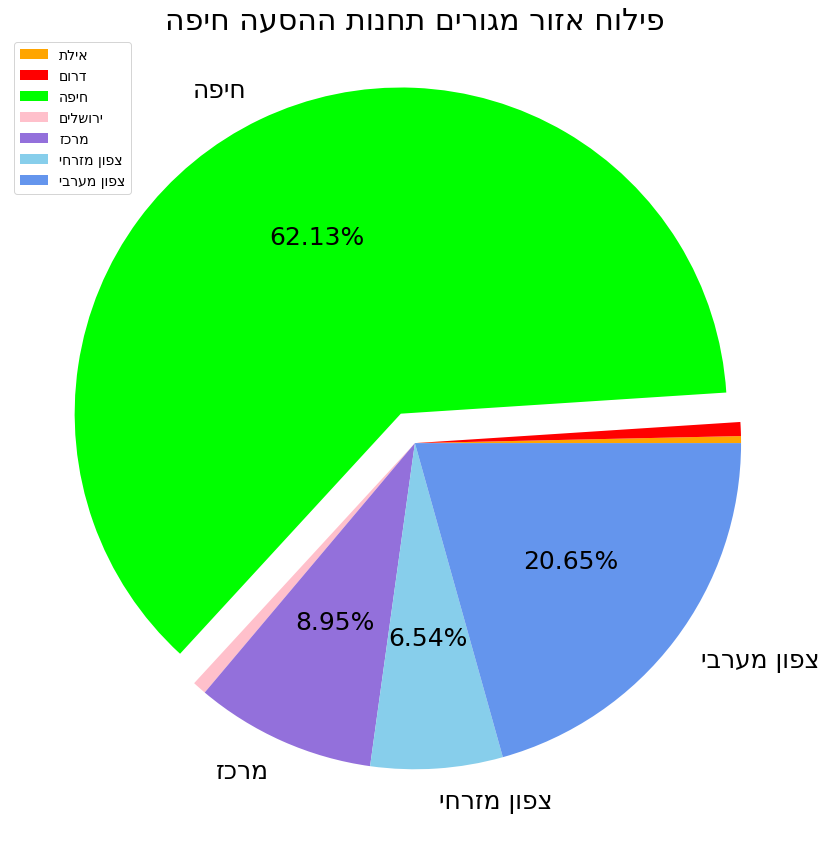

In [4]:
henionim_haifa = ['חניון חוף זמיר חיפה', 'חוף הכרמל חיפה','לב המפרץ חיפה']

df = all_data[(all_data[all_data.columns[5]].isin(henionim_haifa))]
df1 = df[df.columns[48]].value_counts().sort_index()
labels = df1.index
sizes = df1.values

labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,df1.values/sum(df1.values)))

colors = dict(zip(labels,my_colors[:1] + my_colors[2:]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels=[label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',explode = [0]*2 + [0.1] + [0]*4,textprops={'fontsize': 25})
title_text = 'פילוח אזור מגורים תחנות ההסעה חיפה'
plt.title(title_text[::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'upper left',fontsize = 14)
plt.show()

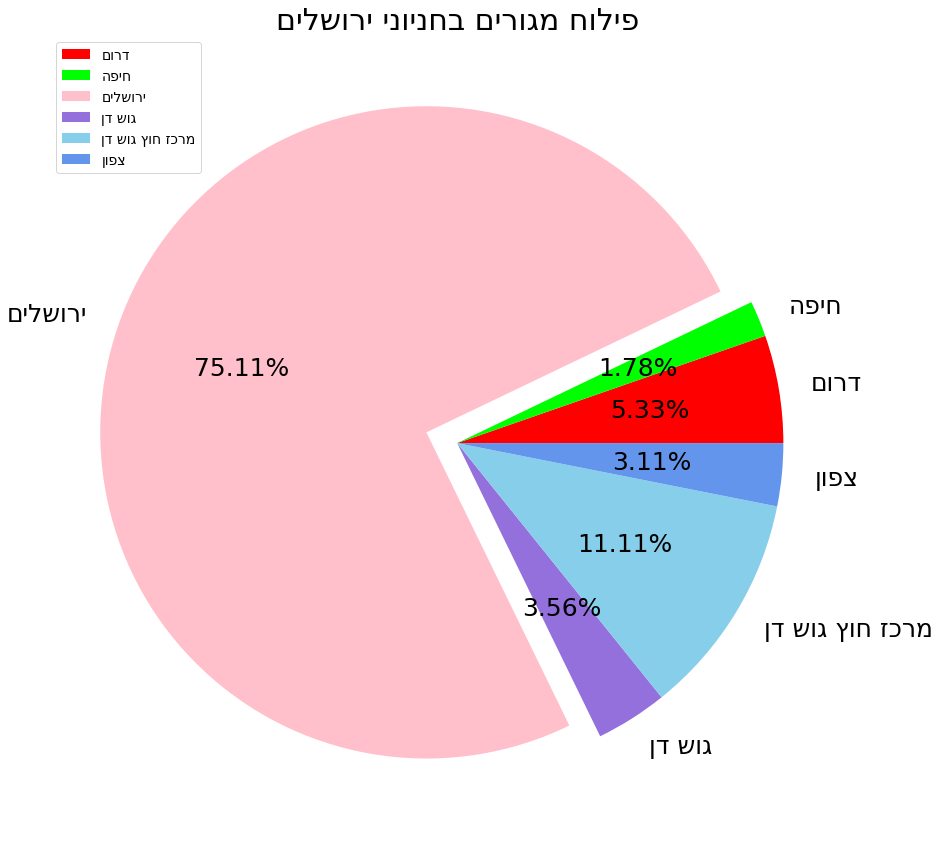

In [5]:

labels = ["דרום","חיפה","ירושלים","גוש דן","מרכז חוץ גוש דן","צפון"]
sizes = [12,4,169,8,25,7]
labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,np.array(sizes)/sum(sizes)))

colors = dict(zip(labels,my_colors[2:8]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels = [label if label_dict[label]>0.015  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 1.5 else '',explode = [0]*2 + [0.1] + [0]*3,textprops={'fontsize': 25})
title_text = 'פילוח מגורים בחניוני ירושלים'
plt.title(title_text[::-1], size=  30)
#plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'upper left',fontsize = 14)
plt.show()

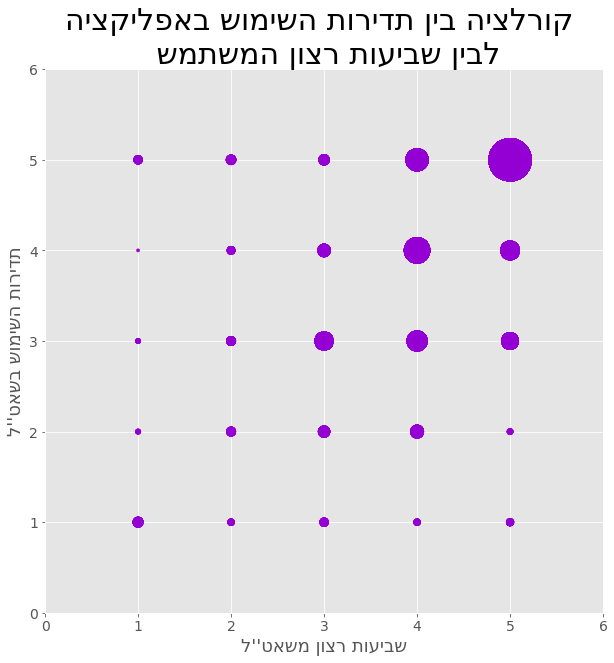

In [6]:
import seaborn as sns
plt.style.use("ggplot")
x = all_data[all_data.columns[28]]
y = all_data[all_data.columns[29]]
# count the occurrences of each point
c = Counter(zip(x,y))
# create a list of the sizes, here multiplied by 10 for scale
s = [10*c[(xx,yy)] for xx,yy in zip(x,y)]
plt.figure(figsize = (10,10))

title_text = "לבין שביעות רצון המשתמש \n קורלציה בין תדירות השימוש באפליקציה"
xlabel = "שביעות רצון משאט''ל"
ylabel = "תדירות השימוש בשאט''ל"
# plot it
plt.xlim(0,6)
plt.ylim(0,6)
plt.scatter(x, y, s=s, color = 'darkviolet')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.ylabel(ylabel[::-1],size = 18)
plt.xlabel(xlabel[::-1],size = 18)
plt.title(title_text[::-1], size=  30)
plt.show()

In [7]:
a = all_data[all_data.columns[16]].value_counts()[:9].index.tolist()
a = a[:5] + a[6:7] + a[-1:]
shatal = a[:3] + a[-2:-1]
for i in [a for a in a if a not in shatal]:
    print(i)
    print(all_data[all_data[all_data.columns[16]]==i][all_data.columns[17]].value_counts(normalize = True))

תחבורה ציבורית - רכבת
הכי נוחים (כיסאות, מזגן, שקעים...)                                                                                                       0.238889
הכי מהירים                                                                                                                               0.133333
הכי נוחים (כיסאות, מזגן, שקעים...), הכי מהירים                                                                                           0.116667
הכי נוחים (כיסאות, מזגן, שקעים...), הכי מהירים, הכי קרובים למקום מגוריי                                                                  0.083333
הכי נוחים (כיסאות, מזגן, שקעים...), הכי מהירים, הכי קרובים למקום מגוריי, שעות יציאתם הכי נוחות                                           0.044444
הכי נוחים (כיסאות, מזגן, שקעים...), הכי קרובים למקום מגוריי                                                                              0.038889
הכי קרובים למקום מגוריי                                                                               

In [8]:
all_data[all_data[all_data.columns[16]].isin(shatal)][all_data.columns[17]].value_counts(normalize = True)[:40]

הכי נוחים (כיסאות, מזגן, שקעים...)                                                                                                       0.180258
הכי מהירים                                                                                                                               0.079399
הכי נוחים (כיסאות, מזגן, שקעים...), הכי מהירים                                                                                           0.071888
הכי קרובים למקום מגוריי                                                                                                                  0.052575
הכי נוחים (כיסאות, מזגן, שקעים...), הכי מהירים, הכי קרובים למקום מגוריי                                                                  0.050429
הכי נוחים (כיסאות, מזגן, שקעים...), הכי מהירים, הכי קרובים למקום מגוריי, אינם עמוסים, שעות יציאתם הכי נוחות, חבריי נוסעים באמצעים אלו    0.045064
הכי נוחים (כיסאות, מזגן, שקעים...), הכי קרובים למקום מגוריי                                                                 

In [9]:
1- all_data[all_data.columns[30]].value_counts(normalize = True)[:4]

לא רלוונטי                             0.273950
השאטל יוצא בשעה שאינה נוחה עבורי       0.905882
לא פתחו עבורי אפשרות להזמין שאטל       0.907563
אין עבורי מקום בשאטל (גם אם הזמנתי)    0.964706
Name: במידה ואינך משתמש באפליקציית "שאטל" בתדירות גבוהה, מהי הסיבה לכך?, dtype: float64

In [10]:
all_data[all_data.columns[26]].value_counts()[:40]

אין צורך                                                 18
לא עובדת                                                 17
לא רלוונטי                                               16
לא צריך                                                  13
לא עובדת לי                                              10
.                                                         9
לא עובד                                                   7
לא עובד לי                                                6
לא יודע                                                   6
כי היא לא עובדת                                           6
ככה                                                       6
אין שאטלים לבסיס שלי                                      5
לא רלוונטית                                               4
היא לא עובדת                                              4
אין לה צורך באפליקציה , קיימת הסעה מאורגנת ע״י היחיד      3
לא רלוונטי לבסיס שלי                                      3
לא יודעת                                

In [11]:
sh_df = pd.DataFrame({"name":["ein zoreh","lo mishtamshim","lo oved","lo relevanti"],"count":[51,20,54,24]})
sh_df

,name,count
0,ein zoreh,51
1,lo mishtamshim,20
2,lo oved,54
3,lo relevanti,24


In [12]:
sh_df["count"]/sh_df["count"].sum()

0    0.342282
1    0.134228
2    0.362416
3    0.161074
Name: count, dtype: float64